In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Assuming the dataset is in a CSV file
df = pd.read_excel('Bollywood_dataset.xlsx')

In [ ]:
print(df.head())

     Movie_Name  Box_Office_Collection  Profit  Earning_Ratio  Budget  \
0  Hate Story 2                     27      15           2.30      12   
1         Alone                     25       7           1.39      18   
2           Zid                     14      -6           0.70      20   
3          NH10                     32      19           2.47      13   
4  Happy Ending                     22     -27           0.45      48   

   Youtube_Views  Youtube_Likes  Youtube_Dislikes  
0       13798789          15708              5226  
1        8788913          18907              2940  
2        6698987           6750              2234  
3        5592977          15464              1513  
4        5192338           6928              1120  


In [ ]:
print(df.isnull().sum())

Movie_Name               0
Box_Office_Collection    0
Profit                   0
Earning_Ratio            0
Budget                   0
Youtube_Views            0
Youtube_Likes            0
Youtube_Dislikes         0
dtype: int64


In [ ]:
print(df.describe())

       Box_Office_Collection      Profit  Earning_Ratio      Budget  \
count             149.000000  149.000000     149.000000  149.000000   
mean               55.718121   26.221477       1.768591   29.442953   
std                94.474584   79.101273       1.836528   28.237981   
min                 0.000000  -57.000000       0.010000    2.000000   
25%                 9.000000   -7.000000       0.530000   11.000000   
50%                28.000000    3.000000       1.200000   21.000000   
75%                57.000000   27.000000       2.390000   35.000000   
max               735.000000  650.000000       9.170000  150.000000   

       Youtube_Views  Youtube_Likes  Youtube_Dislikes  
count   1.490000e+02     149.000000        149.000000  
mean    3.337920e+06    7877.536913       1207.818792  
std     3.504407e+06   12748.047191       1852.692938  
min     4.354000e+03       1.000000          1.000000  
25%     1.076591e+06    1377.000000        189.000000  
50%     2.375050e+06    

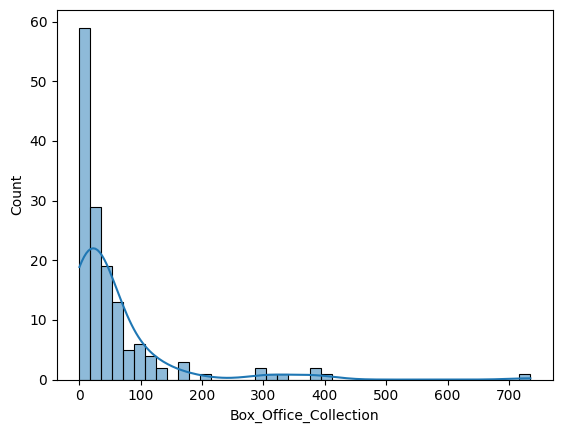

In [ ]:
sns.histplot(df['Box_Office_Collection'], kde=True)
plt.show()

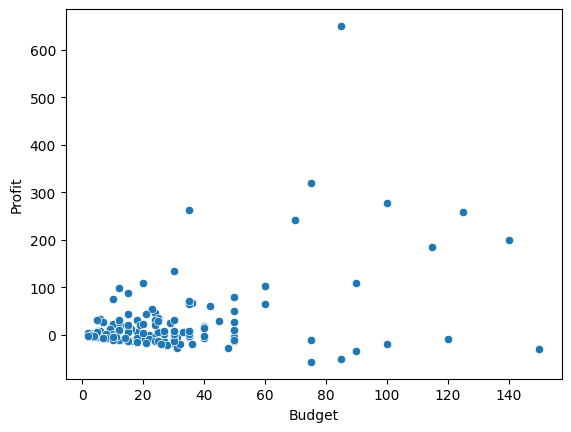

In [ ]:
sns.scatterplot(x='Budget', y='Profit', data=df)
plt.show()

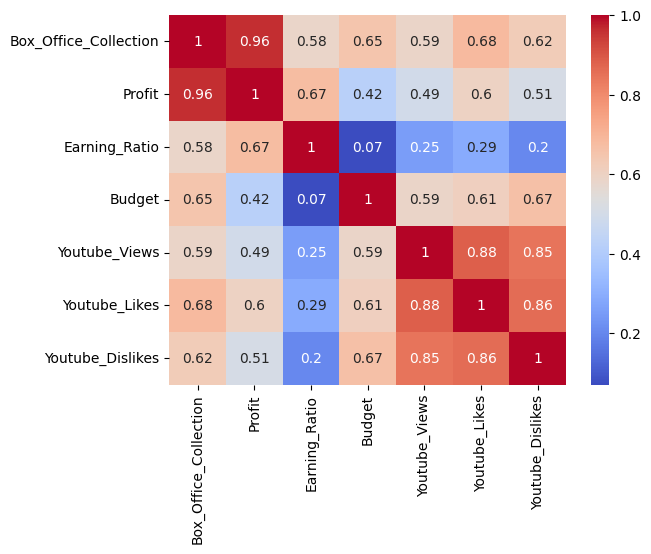

In [ ]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df['ROI'] = df['Profit'] / df['Budget']

In [ ]:
features = df[['Box_Office_Collection', 'Profit', 'Budget', 'Youtube_Views', 'Youtube_Likes', 'Youtube_Dislikes']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


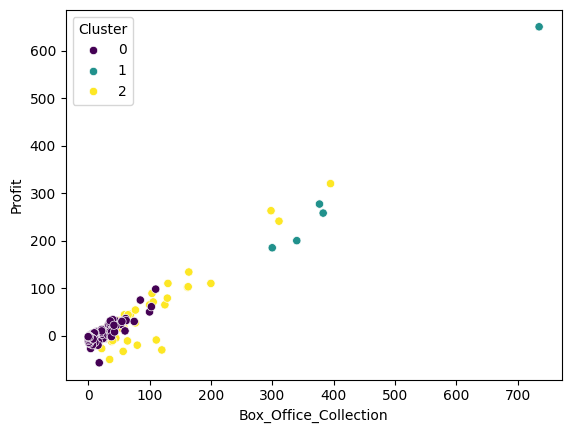

In [ ]:
sns.scatterplot(x='Box_Office_Collection', y='Profit', hue='Cluster', data=df, palette='viridis')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
X = df[['Budget', 'Youtube_Views', 'Youtube_Likes', 'Youtube_Dislikes']]
y = df['Box_Office_Collection']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions for training data
y_train_pred = model.predict(X_train)
# Predictions for testing data
y_test_pred = model.predict(X_test)

# Metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Metrics for the testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Training Set Metrics:")
print(f"Mean Squared Error: {train_mse}")
print(f"Root Mean Squared Error: {train_rmse}")
print(f"R2 Score: {train_r2}")

print("\nTesting Set Metrics:")
print(f"Mean Squared Error: {test_mse}")
print(f"Root Mean Squared Error: {test_rmse}")
print(f"R2 Score: {test_r2}")



Training Set Metrics:
Mean Squared Error: 4299.469416922646
Root Mean Squared Error: 65.57033946017548
R2 Score: 0.5710334623745561

Testing Set Metrics:
Mean Squared Error: 2684.720481894148
Root Mean Squared Error: 51.81428839513429
R2 Score: 0.34867796469185786


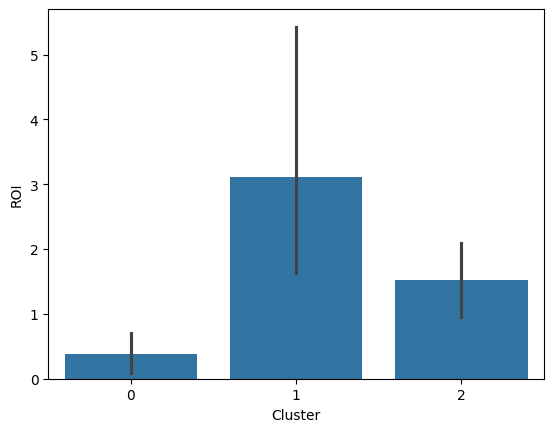

In [ ]:
sns.barplot(x='Cluster', y='ROI', data=df)
plt.show()

In [ ]:
# Create a dictionary to map cluster labels to descriptive names
cluster_names = {
    0: 'Low Budget/Low Return',
    1: 'Mid-Range Performers',
    2: 'High Budget/High Return'
}

# Add a new column to the dataframe with cluster names
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

# Display the dataframe with the new Cluster_Name column
print(df[['Cluster', 'Cluster_Name']].head())


   Cluster             Cluster_Name
0        2  High Budget/High Return
1        2  High Budget/High Return
2        2  High Budget/High Return
3        2  High Budget/High Return
4        2  High Budget/High Return


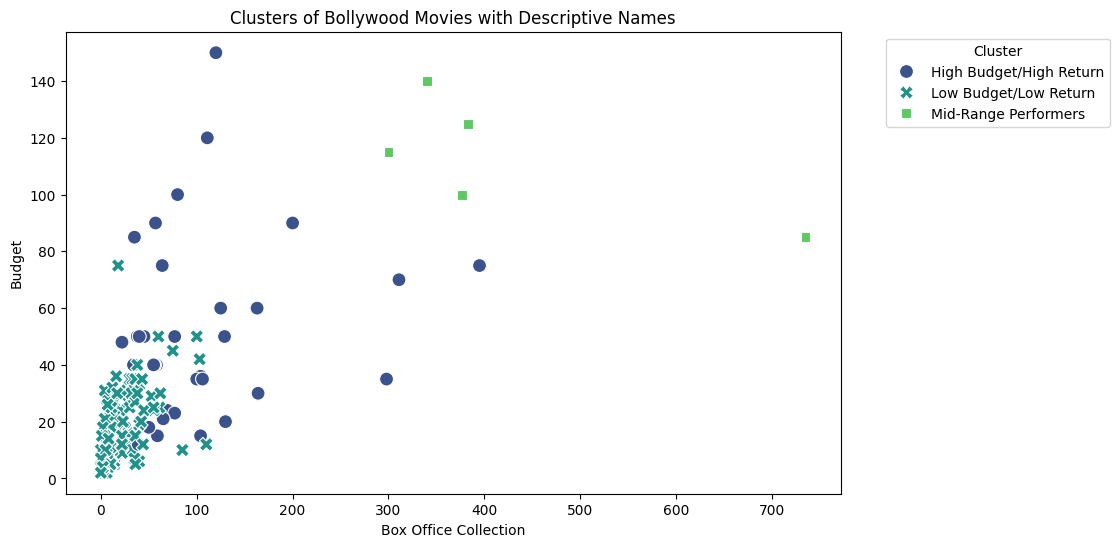

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(
    x='Box_Office_Collection',
    y='Budget',
    hue='Cluster_Name',
    data=df,
    palette='viridis',
    style='Cluster_Name',
    s=100
)

# Add plot title and labels
plt.title('Clusters of Bollywood Movies with Descriptive Names')
plt.xlabel('Box Office Collection')
plt.ylabel('Budget')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


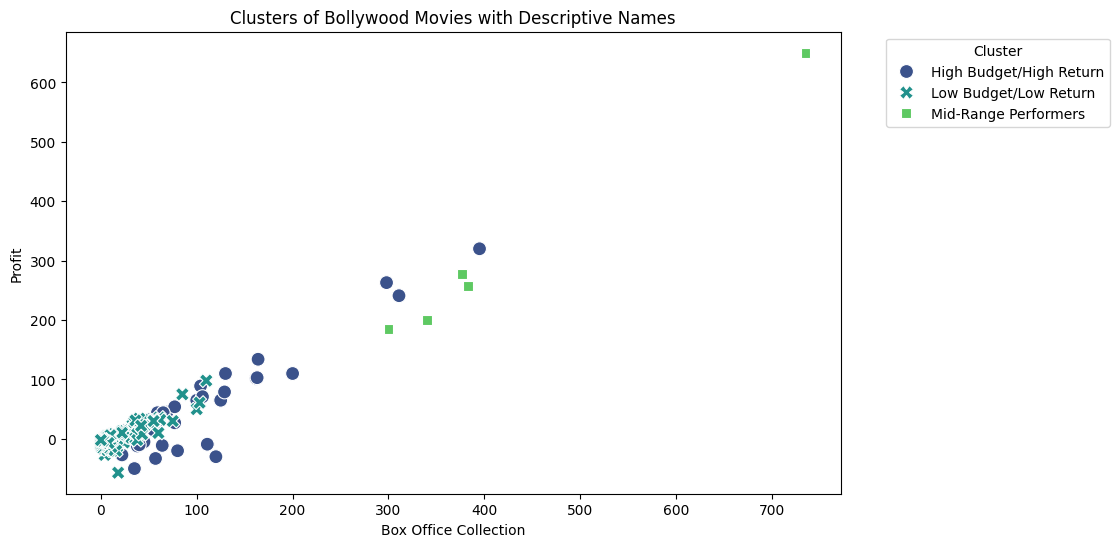

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(
    x='Box_Office_Collection',
    y='Profit',
    hue='Cluster_Name',
    data=df,
    palette='viridis',
    style='Cluster_Name',
    s=100
)

# Add plot title and labels
plt.title('Clusters of Bollywood Movies with Descriptive Names')
plt.xlabel('Box Office Collection')
plt.ylabel('Profit')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a binary target variable for profitability
df['Is_Profitable'] = (df['Profit'] > 0).astype(int)

# Features and target variable
X = df[['Budget', 'Youtube_Views', 'Youtube_Likes', 'Youtube_Dislikes']]
y = df['Is_Profitable']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions for training and testing datasets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy}")
print(classification_report(y_train, y_train_pred))

# Evaluate the model on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTesting Set Metrics:")
print(f"Accuracy: {test_accuracy}")
print(classification_report(y_test, y_test_pred))



Training Set Metrics:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        67

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119


Testing Set Metrics:
Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.79      0.69      0.73        16

    accuracy                           0.73        30
   macro avg       0.74      0.74      0.73        30
weighted avg       0.74      0.73      0.73        30



In [ ]:
# Calculate sentiment score as a new feature
df['Sentiment_Score'] = df['Youtube_Likes'] / (df['Youtube_Likes'] + df['Youtube_Dislikes'])

# Correlation analysis
sentiment_correlation = df[['Sentiment_Score', 'Box_Office_Collection']].corr()
print(sentiment_correlation)


                       Sentiment_Score  Box_Office_Collection
Sentiment_Score               1.000000               0.134908
Box_Office_Collection         0.134908               1.000000


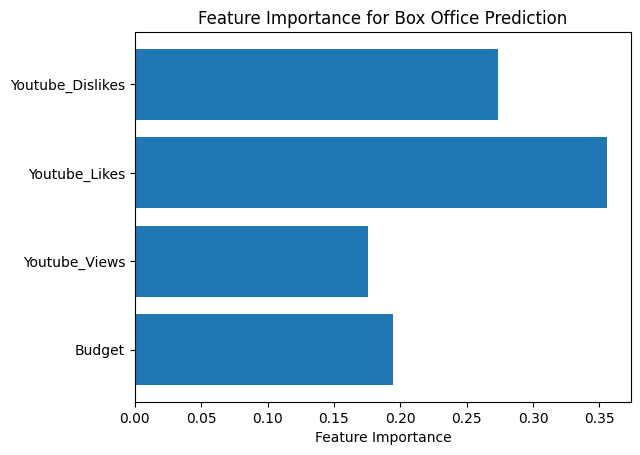

In [ ]:
from xgboost import XGBRegressor
from matplotlib import pyplot as plt

# Train a model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Plot feature importance
feature_importance = model.feature_importances_
features = X.columns
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Box Office Prediction')
plt.show()


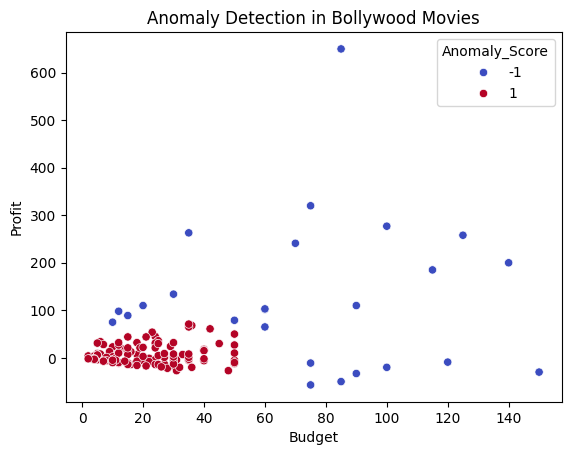

In [ ]:
from sklearn.ensemble import IsolationForest

# Train an isolation forest
iso_forest = IsolationForest(random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(df[['Box_Office_Collection', 'Budget', 'Profit']])

# Visualize anomalies
sns.scatterplot(x='Budget', y='Profit', hue='Anomaly_Score', data=df, palette='coolwarm')
plt.title('Anomaly Detection in Bollywood Movies')
plt.show()
